## 3.5.	Preprocess the image data used in CNN modeling through running the script in this Jupyter Notebook. ”, including image resizing, black color conversion, and image signal normalization.

In [ ]:
import os
import glob
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras import utils as np_utils
from keras.callbacks import EarlyStopping
from tensorflow import keras
import tensorflow as tf
from keras.optimizers import Adam
from datetime import datetime
from sklearn.utils import class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Model
from numpy import expand_dims
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import sklearn

#print(tf.__version__)
#print(keras.__version__)


In [ ]:
# creating a folder "Output_3class" for storing results during CNN model trainging and testing
imagesavepath = "Output_3class/"
if not os.path.exists(imagesavepath):
    os.makedirs(imagesavepath)

In [ ]:
# collecting all image data, assigning labels
images_2D = []
labels_2D = []
dict_labels_2D = {"0_background":0, "1_wasabi":1, "2_alcohol":2}
size_2D = (268,268)

for folders in glob.glob("modeling\\train\\*_*"):
    print(folders, "reading images...")
    
    for filename in os.listdir(folders):
        label = folders.split("\\")[-1]
        try:
            img=cv2.imread(os.path.join(folders, filename))
            if img is not None:
                img = cv2.resize(img, dsize=size_2D)  # image resizing
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # black color conversion
                images_2D.append(img)
                labels_2D.append(dict_labels_2D[label])
        except:
            print(os.path.join(folders, filename), "cannot read image")
            pass

In [ ]:
# checking the number of images and labels in their python list
print(len(images_2D), len(labels_2D))

In [ ]:
# converting the python list into a numpy array
np_images_2D = np.array(images_2D, dtype=np.float32).reshape(-1,268,268,1)

## 3.6.	Split the training materials into internal training and testing datasets in a 8:2 fashion randomly.

In [ ]:
# performing train/test split
train_feature_2D, test_feature_2D, train_label_2D, test_label_2D = \
    train_test_split(np_images_2D, labels_2D, test_size=0.2, random_state=42)

In [ ]:
# defining a function for Scenario A images previewing
def show_images_new_prediction(images, predictions, start_id, num=25):
    
    plt.gcf().set_size_inches(12,14)
    
    if num>25: num=25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[start_id])
        if (len(predictions) > 0):
            title = "ai = " 
            title += "\nlabel = " + str(predictions[start_id])
        else:
            title = "label = "
        ax.set_title(title, fontsize=12)
        ax.set_xticks([]); ax.set_yticks([])
        start_id += 555
    plt.set_cmap("Greys_r")
    plt.savefig("Output_3class\previewBackgroundSamples_2D.jpg", dpi=300)
    plt.close()

In [ ]:
# calling the defined function for saving the previewed images of Scenario A
show_images_new_prediction(np_images_2D, labels_2D, 25)

In [ ]:
# calling the defined function for saving the previewed images of Scenario A
show_images_new_prediction(np_images_2D, labels_2D, 25)

In [ ]:
# defining a function for Scenario B images previewing
def show_images_new_prediction(images, predictions, start_id, num=25):
    
    plt.gcf().set_size_inches(12,14)
    
    if num>25: num=25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[start_id])
        if (len(predictions) > 0):
            title = "ai = " 
            title += "\nlabel = " + str(predictions[start_id])
        else:
            title = "label = "
        ax.set_title(title, fontsize=12)
        ax.set_xticks([]); ax.set_yticks([])
        start_id += 555
    plt.set_cmap("Greys_r")
    plt.savefig("Output_3class\previewWasabiSamples_2D.jpg", dpi=300)
    plt.close()

In [ ]:
# calling the defined function for saving the previewed images of Scenario B
show_images_new_prediction(np_images_2D, labels_2D, 17286+25)

In [ ]:
# defining a function for Scenario D images previewing
def show_images_new_prediction(images, predictions, start_id, num=25):
    
    plt.gcf().set_size_inches(12,14)
    
    if num>25: num=25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[start_id])
        if (len(predictions) > 0):
            title = "ai = " 
            title += "\nlabel = " + str(predictions[start_id])
        else:
            title = "label = "
        ax.set_title(title, fontsize=12)
        ax.set_xticks([]); ax.set_yticks([])
        start_id += 333
    plt.set_cmap("Greys_r")
    plt.savefig("Output_3class\previewAlcoholSamples_2D.jpg", dpi=300)
    plt.close()

In [ ]:
# calling the defined function for saving the previewed images of Scenario D
show_images_new_prediction(np_images_2D, labels_2D, 17286+16140+25)

In [ ]:
# converting the numpy arrays into the data type that is suitable to CNN
train_feature_2D = np.array(train_feature_2D, dtype=np.float32)
test_feature_2D = np.array(test_feature_2D, dtype=np.float32)
train_label_2D = np.array(train_label_2D, dtype=np.int32)
test_label_2D = np.array(test_label_2D, dtype=np.int32)

In [ ]:
# checking the number of images and labels in their python list
print(len(train_feature_2D), len(test_feature_2D))
print(train_feature_2D.shape, train_label_2D.shape)
print(test_feature_2D.shape, test_label_2D.shape)

In [ ]:
# saving all numpy arrays
imagesavepath = "Output_3class/"
if not os.path.exists(imagesavepath):
    os.makedirs(imagesavepath)
np.save(imagesavepath + "train_feature_2D.npy", train_feature_2D)
print("train_feature_2D.npy is saved.")
np.save(imagesavepath + "test_feature_2D.npy", test_feature_2D)
print("test_feature_2D.npy is saved.")
np.save(imagesavepath + "train_label_2D.npy", train_label_2D)
print("train_label_2D.npy is saved.")
np.save(imagesavepath + "test_label_2D.npy", test_label_2D)
print("test_label_2D.npy is saved.")

In [ ]:
# loading all saved numpy arrays in case a "OutOfMomeryError" is flowed out
imagesavepath = "Output_3class/"
train_label_2D = np.load(imagesavepath + "train_label_2D.npy")
test_label_2D = np.load(imagesavepath + "test_label_2D.npy")

In [ ]:
# normalizing image signal
train_feature_2Dnormalize = (np.load(imagesavepath + "train_feature_2D.npy"))/255
test_feature_2Dnormalize = (np.load(imagesavepath + "test_feature_2D.npy"))/255

In [ ]:
# converting lables into the fashion of one-hot encoding
train_label_2Donehot = np_utils.to_categorical(np.load(imagesavepath + "train_label_2D.npy"))
test_label_2Donehot = np_utils.to_categorical(np.load(imagesavepath + "test_label_2D.npy"))

In [ ]:
# defining the path of output directory
OUTPUT_PATH = "Output_3class/"

# initializing the input shape and number of classes
INPUT_SHAPE = (268, 268, 1)
NUM_CLASSES = 3

# defining the maximum number of epochs to train, batch size, and the early stopping patience
EPOCHS = 250
BATCH_SIZE = 64
EARLY_STOPPING_PATIENCE = 3

# initializing the label names
labelNames = ["0_background", "1_wasabi", "2_alcohol"]

# initializing an early stopping callback to prevent the model from overfitting or spending too much time training with minimal gains
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=EARLY_STOPPING_PATIENCE,
    restore_best_weights=True)

## 3.7.	Initialize the architecture for CNN. Design the number of outputs of CNN based on the number of scenarios be examined.

In [ ]:
# computing class weight based on appearance of each class
cls_wgts = class_weight.compute_class_weight(class_weight="balanced", 
                                             classes=np.unique(train_label_2D), 
                                             y=train_label_2D)
# dict mapping
cls_wgts = {i : cls_wgts[i] for i, label in enumerate(np.unique(train_label_2D))}

In [ ]:
# creating the performance metrics
METRICS = [
    tf.keras.metrics.TruePositives(name='tp'),
    tf.keras.metrics.FalsePositives(name='fp'),
    tf.keras.metrics.TrueNegatives(name='tn'),
    tf.keras.metrics.FalseNegatives(name='fn'), 
    tf.keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.AUC(name='auc'),
    tf.keras.metrics.AUC(name='prc', curve='PR'),  # precision-recall curve
]

# initializing the model along with the input shape and channel
inputShape = INPUT_SHAPE
inputs = tf.keras.layers.Input(inputShape)
s = tf.keras.layers.Lambda(lambda x: x/ 1)(inputs)
chanDim = -1

# 1st layer 1st CONV => RELU layer set
# 268
L1 = tf.keras.layers.Conv2D(filters=8, kernel_size=(3, 3), 
                            activation="relu", kernel_initializer="he_normal", padding="valid")(s)
#L1 = tf.keras.layers.Dropout(0.1)(L1)
# 266
# 1st layer 2nd CONV => RELU => POOL layer set
L1 = tf.keras.layers.Conv2D(filters=8, kernel_size=(3, 3), 
                            activation="relu", kernel_initializer="he_normal", padding="valid")(L1)
# 264
#model.add(BatchNormalization(axis=chanDim))
P1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(L1)
# 132

# 2nd layer 1st CONV => RELU layer set
L2 = tf.keras.layers.Conv2D(filters=8, kernel_size=(3, 3), 
                            activation="relu", kernel_initializer="he_normal", padding="valid")(P1)
L2 = tf.keras.layers.Dropout(0.1)(L2)
# 130
# 2nd layer 2nd CONV => RELU => POOL layer set
L2 = tf.keras.layers.Conv2D(filters=8, kernel_size=(3, 3), 
                            activation="relu", kernel_initializer="he_normal", padding="valid")(L2)
#model.add(BatchNormalization(axis=chanDim))
# 128
P2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(L2)
# 64

# 3rd layer 1st CONV => RELU layer set
#L3 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), 
#                            activation="relu", kernel_initializer="he_normal", padding="valid")(P2)
#L3 = tf.keras.layers.Dropout(0.2)(L3)
# 60
# 3rd layer 2nd CONV => RELU => POOL layer set
#L3 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), 
#                            activation="relu", kernel_initializer="he_normal", padding="valid")(L3)
# 58
#model.add(BatchNormalization(axis=chanDim))
#P3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(L3)
# 29

# 4th layer 1st Dense => RELU layer set
L4 = tf.keras.layers.Flatten()(P2) #(P3)
L5 = tf.keras.layers.Dense(units=64, activation="relu", kernel_initializer="he_normal")(L4) #128
L5 = tf.keras.layers.Dropout(0.5)(L5)  #0.2

# 5th layer 2nd Dense => RELU layer set
#L6 = tf.keras.layers.Dense(units=64, activation="relu", kernel_initializer="he_normal")(L5)
#L6 = tf.keras.layers.Dropout(0.1)(L6)

# 6th layer 3rd Dense => RELU layer set
# 3.7. Design the number of outputs of CNN based on the number of scenarios be examined.
# NOTE: For example, in this study, the neural network was designated to classify 3 classes.
outputs = tf.keras.layers.Dense(units=3, activation="softmax")(L5)  #(L6) sigmoid

model = tf.keras.Model(inputs=[inputs], outputs=[outputs])

# initializing the learning rate choices and optimizer
lr = 1e-3
opt = Adam(learning_rate=lr)

          
model.summary

# compiling the model
model.compile(optimizer=opt, loss="categorical_crossentropy", #binary_crossentropy
              weighted_metrics=['categorical_accuracy'],  # newly added
              metrics=METRICS)


## 3.8.	Find the hyperparameters combination that yields minimal loss on the internal test samples for CNN construction.

## 3.9.	Adopt the optimal hyperparameters combination for constructing CNN architecture.

In [40]:
# recording the duration of CNN hyperparameters tuning
start = datetime.now()

# building the best model for training
print("[INFO] training the best model...")
EPOCHS = 250
BATCH_SIZE = 64
EARLY_STOPPING_PATIENCE = 3
print("EPOCHS = ", EPOCHS , ", BS = ", BATCH_SIZE , ", ESP = ", EARLY_STOPPING_PATIENCE)

History_imbalanced = model.fit(x=train_feature_2Dnormalize, y=train_label_2Donehot, 
                               validation_data=(test_feature_2Dnormalize, test_label_2Donehot), 
                               batch_size=BATCH_SIZE, class_weight=cls_wgts, 
                               epochs=EPOCHS, callbacks =[early_stopping], verbose=1)

end = datetime.now()
Duration = end - start
print(Duration) 

[INFO] training the best model...
EPOCHS =  250 , BS =  64 , ESP =  3
Epoch 1/250
555/555 [==============================] - 1594s 3s/step - loss: 0.2392 - tp: 31287.0000 - fp: 1787.0000 - tn: 69185.0000 - fn: 4199.0000 - accuracy: 0.9080 - precision: 0.9460 - recall: 0.8817 - auc: 0.9884 - prc: 0.9793 - val_loss: 3.8294e-09 - val_tp: 8872.0000 - val_fp: 0.0000e+00 - val_tn: 17744.0000 - val_fn: 0.0000e+00 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000 - val_auc: 1.0000 - val_prc: 1.0000
Epoch 2/250
555/555 [==============================] - 1499s 3s/step - loss: 0.0671 - tp: 33293.0000 - fp: 1038.0000 - tn: 69934.0000 - fn: 2193.0000 - accuracy: 0.9560 - precision: 0.9698 - recall: 0.9382 - auc: 0.9984 - prc: 0.9969 - val_loss: 1.4780e-10 - val_tp: 8872.0000 - val_fp: 0.0000e+00 - val_tn: 17744.0000 - val_fn: 0.0000e+00 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000 - val_auc: 1.0000 - val_prc: 1.0000
Epoch 3/250
555/555 [=====================

In [43]:
# generating CNN model summary
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 268, 268, 1)]     0         
                                                                 
 lambda_3 (Lambda)           (None, 268, 268, 1)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 266, 266, 8)       80        
                                                                 
 conv2d_13 (Conv2D)          (None, 264, 264, 8)       584       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 132, 132, 8)      0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 130, 130, 8)       584       
                                                           

conv2d_12
(3, 3, 1, 8)
8
conv2d_13
(3, 3, 8, 8)
8
conv2d_14
(3, 3, 8, 8)
8
conv2d_15
(3, 3, 8, 8)
8


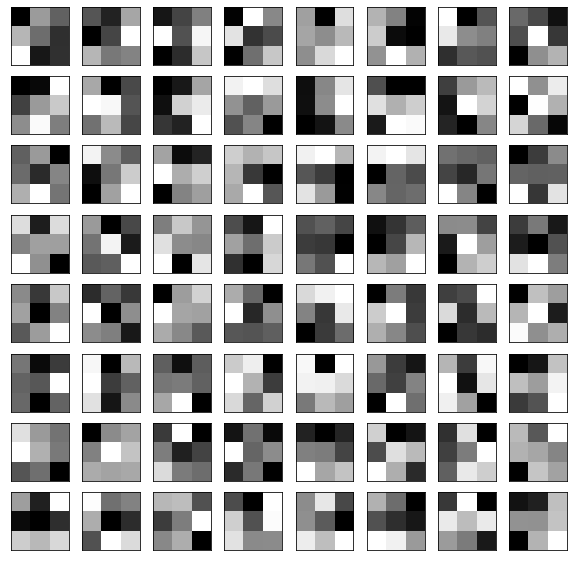

In [44]:
# generating kernal filters for all the layers of the model
for layer in model.layers:
    if 'conv' in layer.name:
        weights, bias= layer.get_weights()
        print(layer.name)
        
        # normalizing filter values between 0 and 1 for visualization
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)  
        print(filters.shape)
        print(filters.shape[3])
        filter_cnt=1
        
        # plotting all the filters
        for i in range(filters.shape[3]):
            # getting the filters
            filt=filters[:,:,:, i]
            # plotting each of the channel, color image RGB channels
            for j in range(filters.shape[2]):
                try:
                    plt.rcParams['figure.figsize'] = [10, 10]
                    ax= plt.subplot(filters.shape[3], filters.shape[2], filter_cnt  )
                    ax.set_xticks([])
                    ax.set_yticks([])
                    plt.imshow(filt[:,:, j], cmap="gray")
                    plt.rcParams["figure.dpi"] = 300
                    plt.savefig(f"Output_3class\cc_{layer.name}.jpg", dpi=300)
                    filter_cnt+=1
                except:
                    pass

In [ ]:
# saving the CNN model and weight
model.save("Output_3class/wasabiIG.h5")
print("wasabiIG.h5 Saving Completed!")
model.save_weights("Output_3class/wasabiIG.weight")
print("wasabiIG.weight Model Parameters Saving Completed!")

In [ ]:
# loading in the saved CNN model and weight
model = tf.keras.models.load_model("Output_3class/wasabiIG.h5")

try:
    model.load_weights("Output_3class/wasabiIG.weight")
    print("import CNN model Completed Successfully!")
except:
    print("import CNN model Failed!")

In [ ]:
# checking index of the targeted image in the python list of images
ind = 0
for folders in glob.glob("modeling\\train\\*_*"):
    print(folders, "reading images...")
    
    for filename in os.listdir(folders):
        label = folders.split("\\")[-1]
        if "v15_frame2964" in str(filename):  # "__imageFileName__" is changable"
            print(ind)
            ind += 1
        else:
            ind += 1

1/1 [==============================] - 0s 163ms/step
(1, 268, 268, 1)
(1, 266, 266, 8)


C:\Users\T1208\AppData\Local\Temp/ipykernel_15028/512318864.py:37: RuntimeWarning: invalid value encountered in true_divide
  z /= z.std ()


(1, 264, 264, 8)
(1, 132, 132, 8)
(1, 130, 130, 8)
(1, 130, 130, 8)
(1, 128, 128, 8)
(1, 64, 64, 8)
(1, 32768)
(1, 64)
(1, 64)
(1, 3)


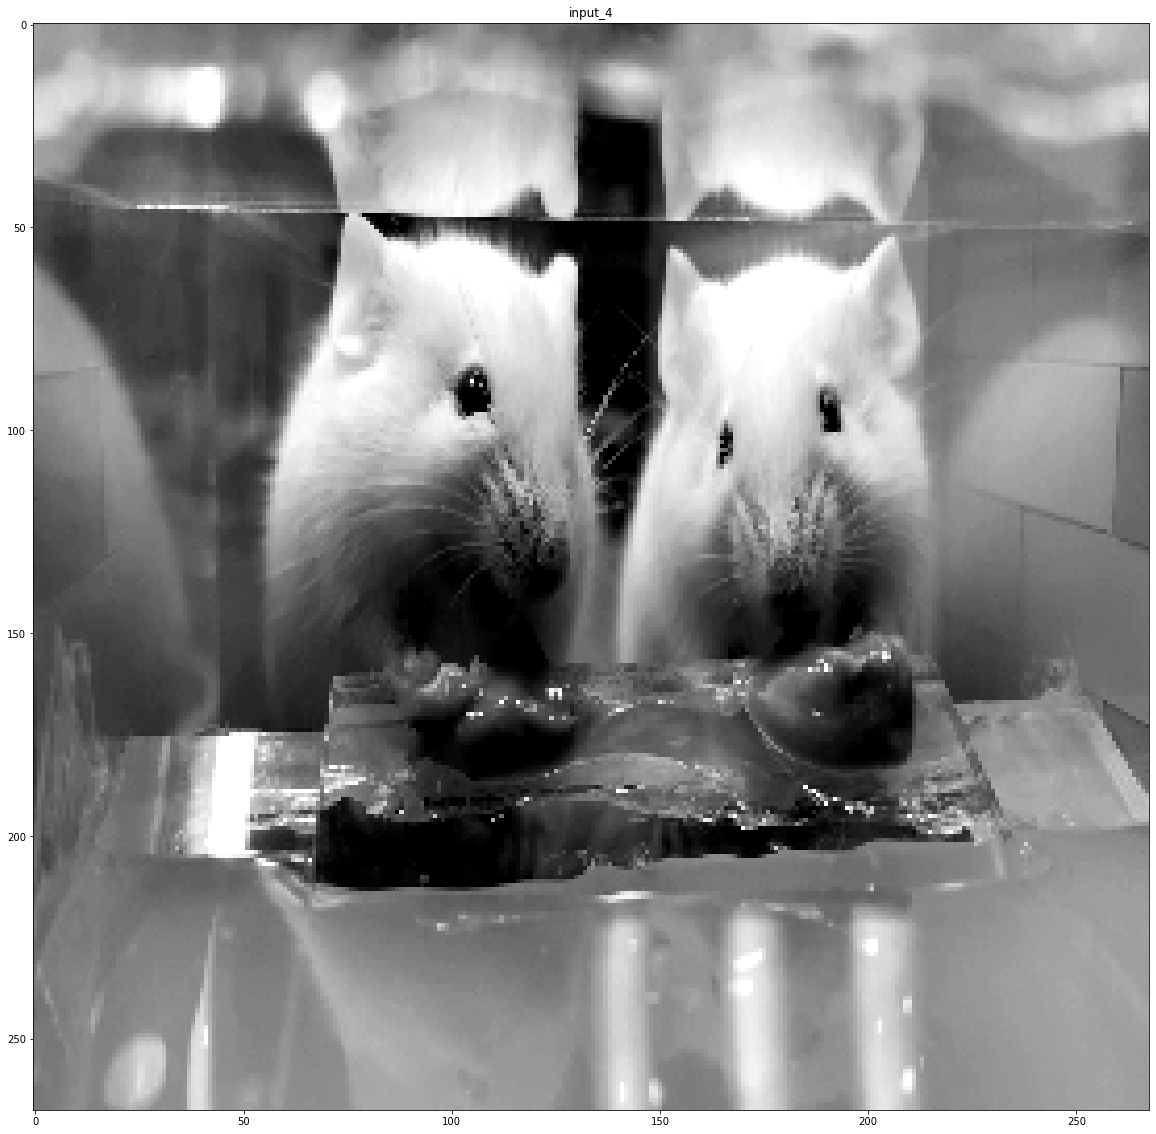

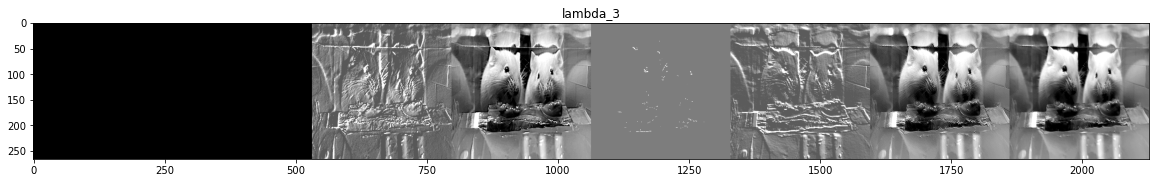

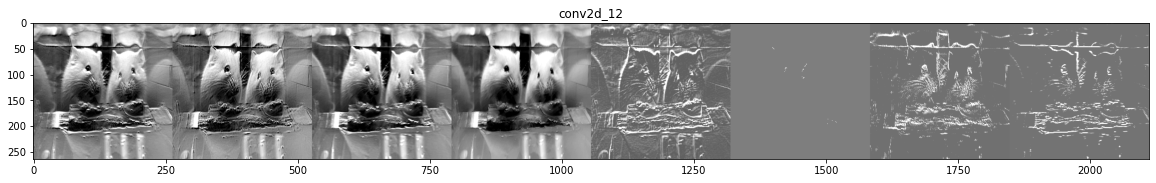

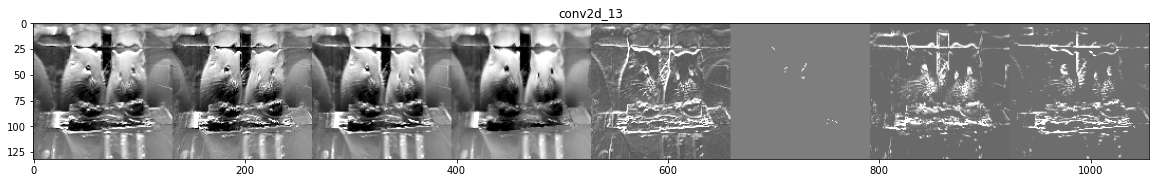

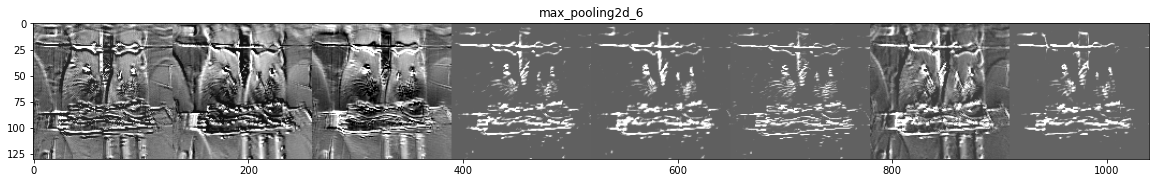

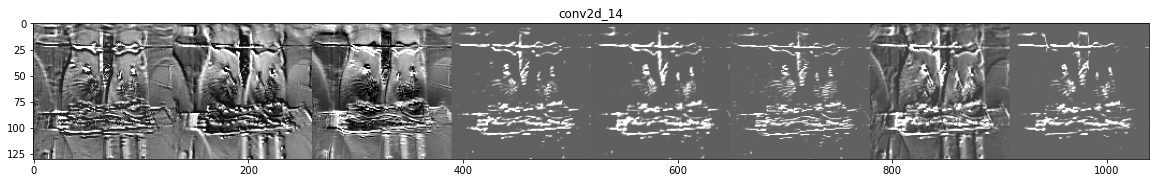

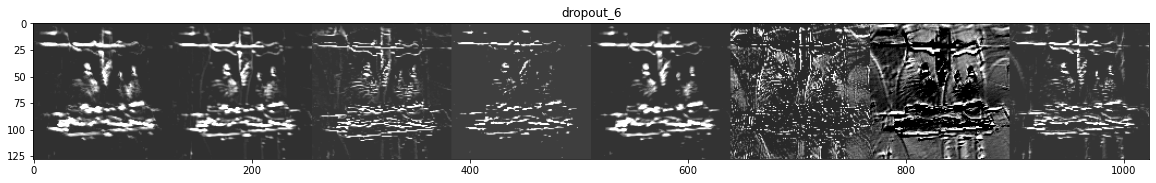

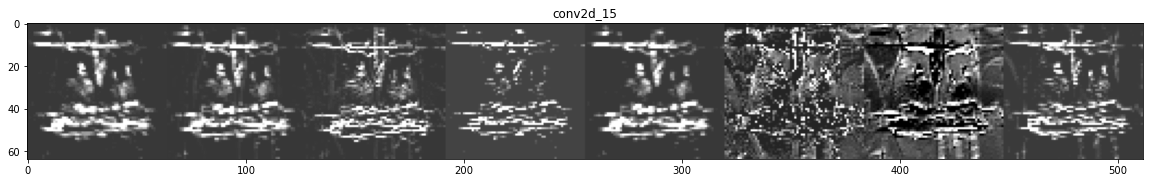

In [16]:
# generating feature map on the targeted image
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.Model(inputs = model.input, outputs = successive_outputs)

x = np_images_2D[(1242)]  # ("__indexNumber__" is changable)
#print(x)
z = []
z_row = []
z.append(x)
z=np.array(z, dtype=np.float32)

z /= 255.0

successive_feature_maps = visualization_model.predict(z)
layer_names = [layer.name for layer in model.layers]

mapsavepath = "Output_3class/backgroundMap/"
if not os.path.exists(mapsavepath):
    os.makedirs(mapsavepath)

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    print(feature_map.shape)
    if len(feature_map.shape) == 4:
    
    # plotting Feature maps for the conv / maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1]  # number of features in the feature map
        size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
        # creating a matrix for image generation
        display_grid = np.zeros((size, size * n_features))
        #print(display_grid, size)

        # postprocessing the feature to be visually palatable
        for i in range(n_features):
            z  = feature_map[0, :, :, i]
            z -= z.mean()
            z /= z.std ()
            z *=  64
            z += 128
            z  = np.clip(z, 0, 255).astype('uint8')
            #print(z)
            
            # tiling each filter into a horizontal grid
            display_grid[:, i * size : (i + 1) * size] = z
            
    # displaying the grid
        scale = 20. / n_features
        plt.figure( figsize=(scale * n_features, scale) )
        plt.title ( layer_name )
        plt.grid  ( False )
        plt.imshow( display_grid, aspect='auto', cmap='gray' )
        plt.rcParams['figure.figsize'] = [10, 10]
    
    # saving
        plt.savefig(f"Output_3class/backgroundMap/backgroundMap_{layer_name}.jpg", dpi=300)
        

1/1 [==============================] - 0s 159ms/step
(1, 268, 268, 1)
(1, 266, 266, 8)


C:\Users\T1208\AppData\Local\Temp/ipykernel_15028/854730076.py:37: RuntimeWarning: invalid value encountered in true_divide
  z /= z.std ()


(1, 264, 264, 8)
(1, 132, 132, 8)
(1, 130, 130, 8)
(1, 130, 130, 8)
(1, 128, 128, 8)
(1, 64, 64, 8)
(1, 32768)
(1, 64)
(1, 64)
(1, 3)


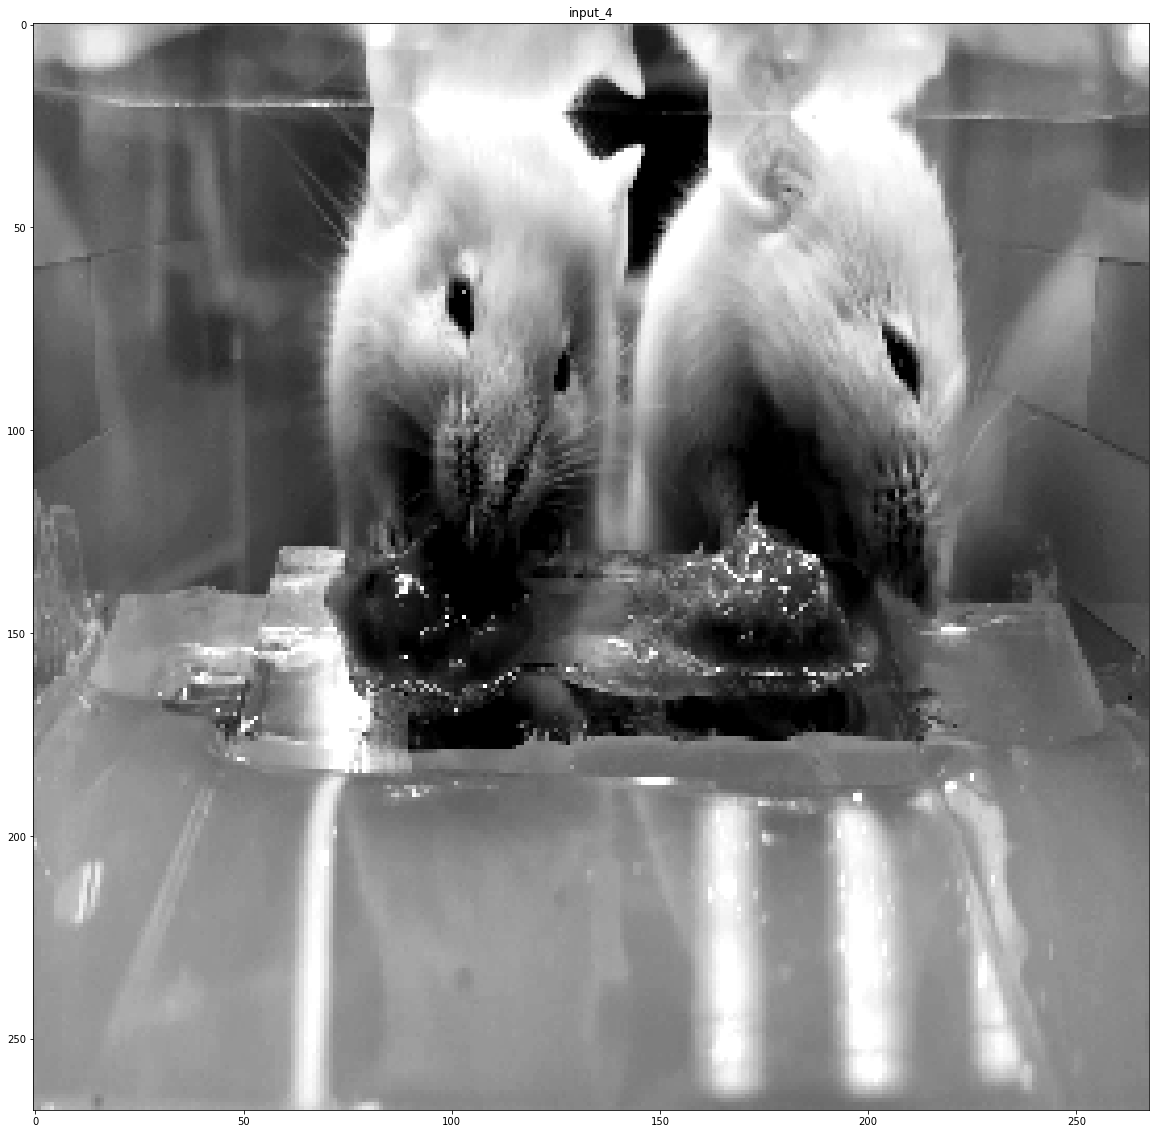

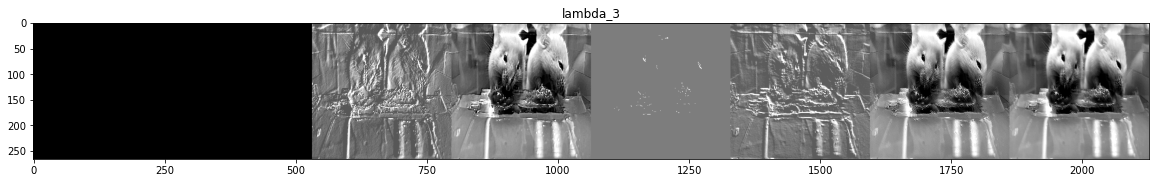

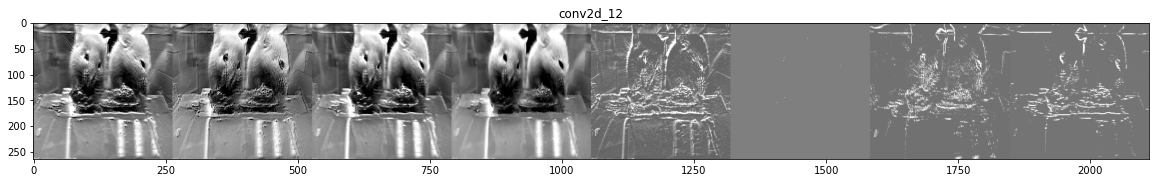

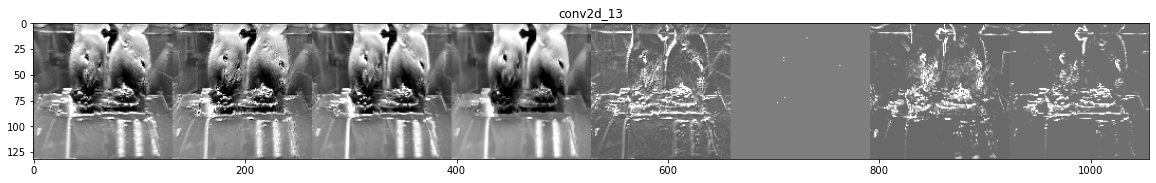

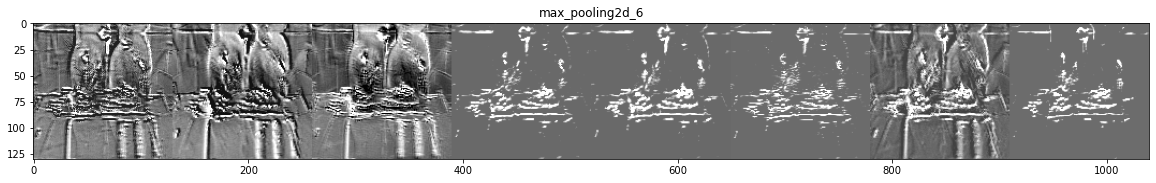

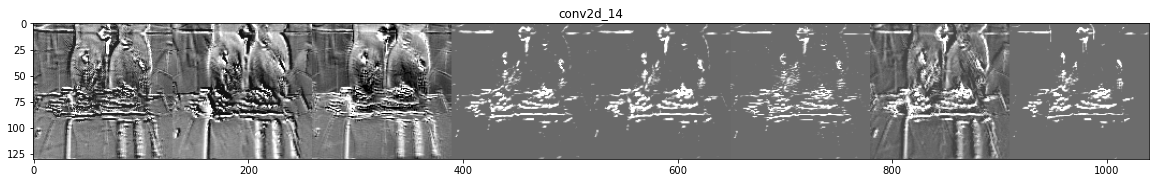

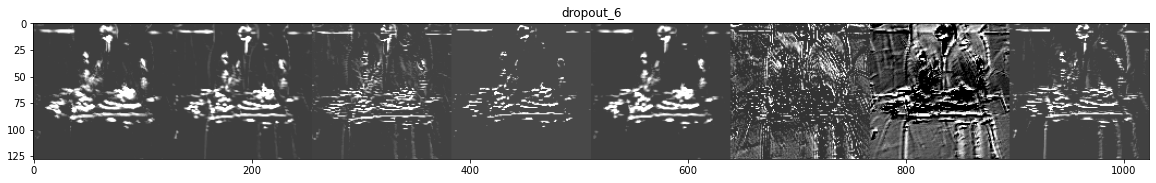

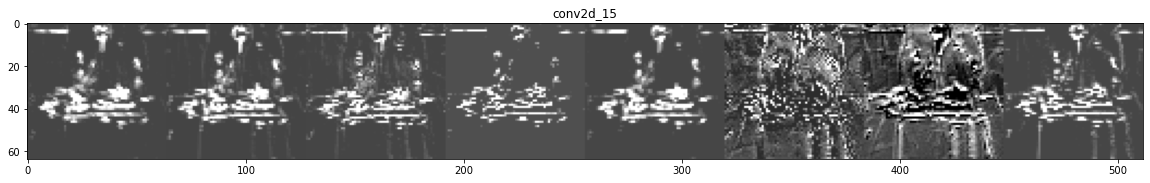

In [17]:
# generating feature map on the targeted image
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.Model(inputs = model.input, outputs = successive_outputs)

x = np_images_2D[(18454)]  # ("__indexNumber__" is changable)
#print(x)
z = []
z_row = []
z.append(x)
z=np.array(z, dtype=np.float32)

z /= 255.0

successive_feature_maps = visualization_model.predict(z)
layer_names = [layer.name for layer in model.layers]

mapsavepath = "Output_3class/wasabiMap/"
if not os.path.exists(mapsavepath):
    os.makedirs(mapsavepath)

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    print(feature_map.shape)
    if len(feature_map.shape) == 4:
    
    # plotting Feature maps for the conv / maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1]  # number of features in the feature map
        size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
        # creating a matrix for image generation
        display_grid = np.zeros((size, size * n_features))
        #print(display_grid, size)

        # postprocessing the feature to be visually palatable
        for i in range(n_features):
            z  = feature_map[0, :, :, i]
            z -= z.mean()
            z /= z.std ()
            z *=  64
            z += 128
            z  = np.clip(z, 0, 255).astype('uint8')
            #print(z)
            
            # tiling each filter into a horizontal grid
            display_grid[:, i * size : (i + 1) * size] = z
            
    # displaying the grid
        scale = 20. / n_features
        plt.figure( figsize=(scale * n_features, scale) )
        plt.title ( layer_name )
        plt.grid  ( False )
        plt.imshow( display_grid, aspect='auto', cmap='gray' )
        plt.rcParams['figure.figsize'] = [10, 10]
    
    # saving
        plt.savefig(f"Output_3class/wasabiMap/wasabiMap_{layer_name}.jpg", dpi=300)
        

1/1 [==============================] - 0s 161ms/step
(1, 268, 268, 1)
(1, 266, 266, 8)


C:\Users\T1208\AppData\Local\Temp/ipykernel_15028/3644804576.py:37: RuntimeWarning: invalid value encountered in true_divide
  z /= z.std ()


(1, 264, 264, 8)
(1, 132, 132, 8)
(1, 130, 130, 8)
(1, 130, 130, 8)
(1, 128, 128, 8)
(1, 64, 64, 8)
(1, 32768)
(1, 64)
(1, 64)
(1, 3)


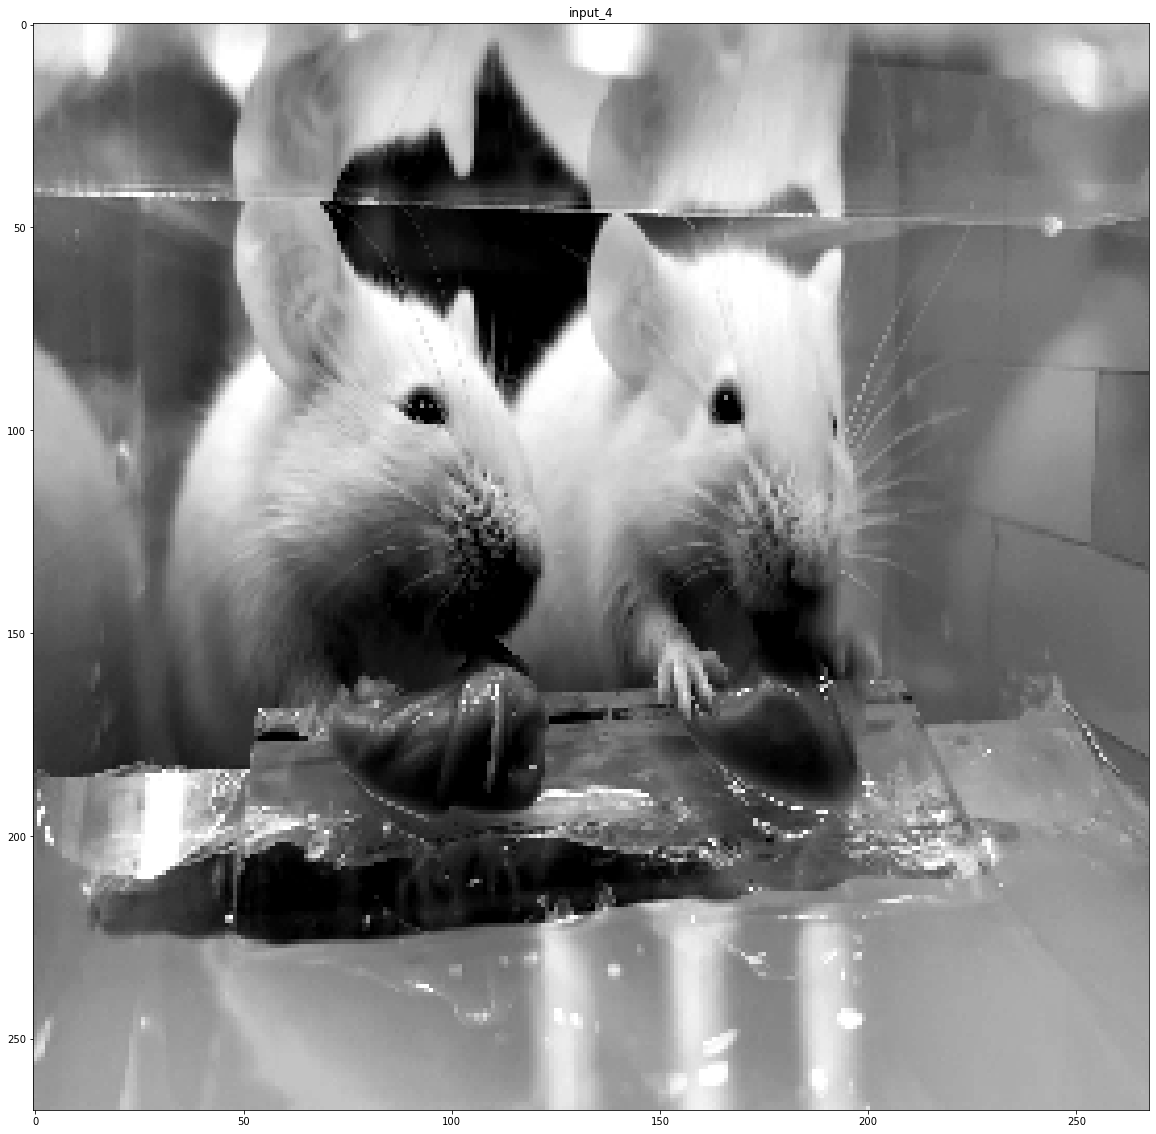

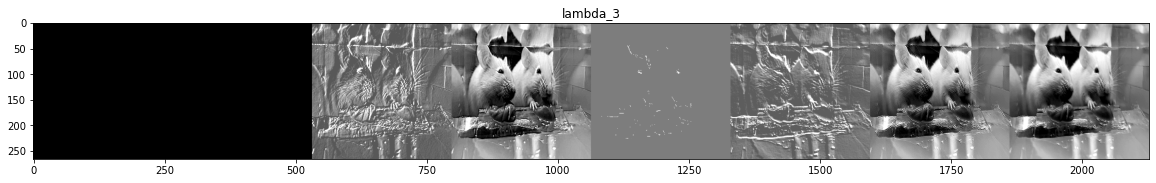

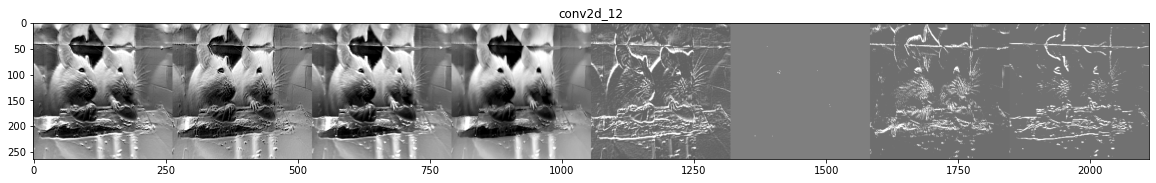

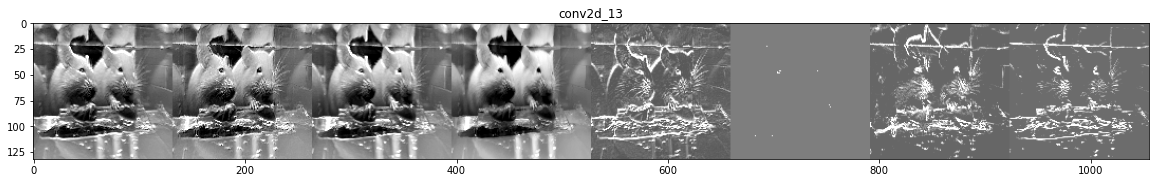

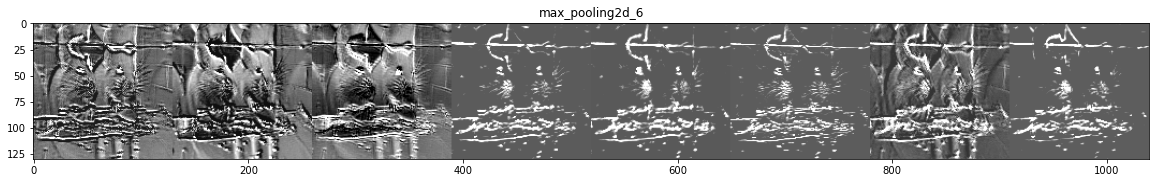

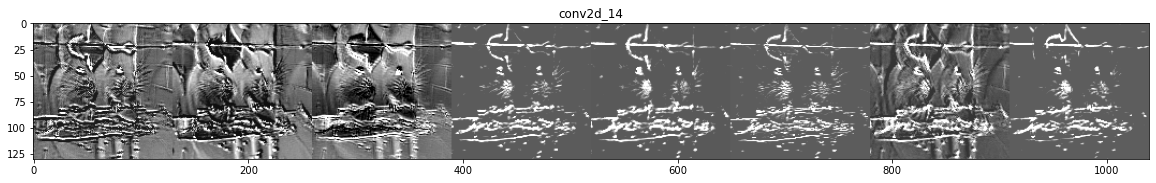

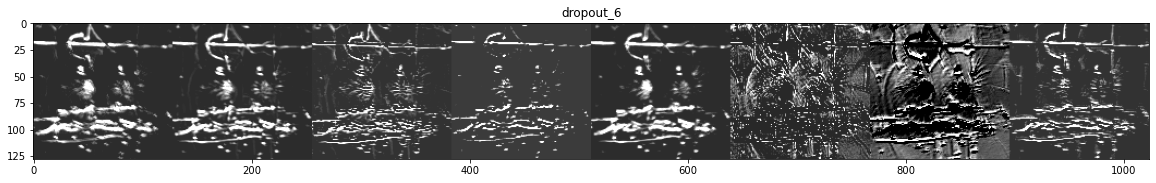

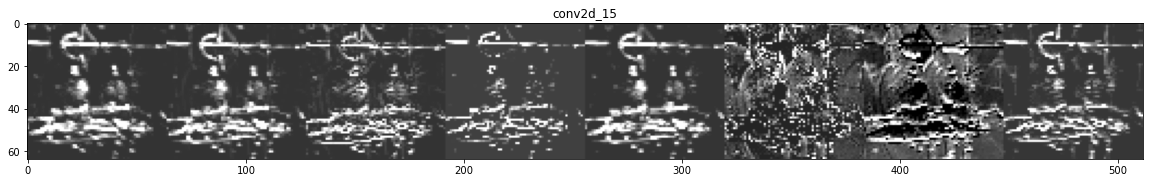

In [20]:
# generating feature map on the targeted image
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.Model(inputs = model.input, outputs = successive_outputs)

x = np_images_2D[(40804)]  # ("__indexNumber__" is changable)
#print(x)
z = []
z_row = []
z.append(x)
z=np.array(z, dtype=np.float32)

z /= 255.0

successive_feature_maps = visualization_model.predict(z)
layer_names = [layer.name for layer in model.layers]

mapsavepath = "Output_3class/alcoholMap/"
if not os.path.exists(mapsavepath):
    os.makedirs(mapsavepath)

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    print(feature_map.shape)
    if len(feature_map.shape) == 4:
    
    # plotting Feature maps for the conv / maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1]  # number of features in the feature map
        size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
        # creating a matrix for image generation
        display_grid = np.zeros((size, size * n_features))
        #print(display_grid, size)

        # postprocessing the feature to be visually palatable
        for i in range(n_features):
            z  = feature_map[0, :, :, i]
            z -= z.mean()
            z /= z.std ()
            z *=  64
            z += 128
            z  = np.clip(z, 0, 255).astype('uint8')
            #print(z)
            
            # tiling each filter into a horizontal grid
            display_grid[:, i * size : (i + 1) * size] = z
            
    # displaying the grid
        scale = 20. / n_features
        plt.figure( figsize=(scale * n_features, scale) )
        plt.title ( layer_name )
        plt.grid  ( False )
        plt.imshow( display_grid, aspect='auto', cmap='gray' )
        plt.rcParams['figure.figsize'] = [10, 10]
        
    # saving
        plt.savefig(f"Output_3class/alcoholMap/alcoholMap_{layer_name}.jpg", dpi=300)

In [ ]:
# pre-defining image size for saving
from matplotlib.pyplot import figure
plt.rcParams['figure.figsize'] = [10, 10]
plt.close()
figure(figsize=(10, 10))

In [ ]:
# defining a function for creating and saving plots of performance metrics during model training
def plot_metrics_2Dimbalanced(history):
    from matplotlib.pyplot import figure
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    metrics = ['loss', 'prc', 'precision', 'recall']
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        plt.subplot(2,2,n+1)
        plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
        plt.plot(history.epoch, history.history['val_'+metric], 
                 color=colors[0], linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        plt.legend('', frameon=False)
        if metric == 'loss':
            plt.ylim([0, plt.ylim()[1]])
        elif metric == 'auc':
            plt.ylim([0.8,1])
        else:
            plt.ylim([0,1])

        plt.legend()
        plt.rcParams['figure.figsize'] = [10, 10]
        #figure(figsize=(8, 6))
        plt.savefig("Output_3class\metrics_2DTrial.jpg", dpi=300)
    plt.close()

In [ ]:
# calling the defined function for creating and saving plots of performance metrics during model training
plot_metrics_2Dimbalanced(history=History_imbalanced)

In [ ]:
# predicting Scenario A, B, D
print("[INFO] evaluating network...")
train_predictions_2Dimbalanced = model.predict(x=train_feature_2Dnormalize, batch_size=BATCH_SIZE)
print(classification_report(train_label_2Donehot.argmax(axis=1), 
                            train_predictions_2Dimbalanced.argmax(axis=1), target_names=labelNames))
test_predictions_2Dimbalanced = model.predict(x=test_feature_2Dnormalize, batch_size=BATCH_SIZE)
print(classification_report(test_label_2Donehot.argmax(axis=1), 
                            test_predictions_2Dimbalanced.argmax(axis=1), target_names=labelNames))

In [58]:
train_label_2Donehot

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [59]:
train_predictions_2Dimbalanced

array([[7.3951167e-38, 1.0000000e+00, 1.2199465e-37],
       [1.0000000e+00, 4.6931626e-18, 8.8880879e-29],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       ...,
       [1.7307084e-37, 7.3355264e-30, 1.0000000e+00],
       [1.0000000e+00, 5.6195393e-15, 7.6269628e-28],
       [1.0000000e+00, 3.2842642e-18, 5.3063196e-32]], dtype=float32)

In [67]:
# defining a function for creating a confusion matrix
def plot_cm_2Dimbalanced(labels, predictions, p=0.5):
    cm_2Dimbalanced = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm_2Dimbalanced, annot=True, fmt="d")
    plt.title('Imbalanced Confusion Matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.savefig(r"D:\wasabiIG\Output_3class\cm_2DTrial.jpg", dpi=300)
    plt.close()

    print('Legitimate Transactions Detected (True Negatives): ', cm_2Dimbalanced[0][0])
    print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm_2Dimbalanced[0][1])
    print('Fraudulent Transactions Missed (False Negatives): ', cm_2Dimbalanced[1][0])
    print('Fraudulent Transactions Detected (True Positives): ', cm_2Dimbalanced[1][1])
    print('Total Fraudulent Transactions: ', np.sum(cm_2Dimbalanced[1]))

In [68]:
# internal modeling testing
model_results_2Dimbalanced = model.evaluate(test_feature_2Dnormalize, test_label_2Donehot, 
                                          batch_size=BATCH_SIZE, verbose=1)
for name, value in zip(model.metrics_names, model_results_2Dimbalanced):
    print(name, ': ', value)

139/139 [==============================] - 71s 514ms/step - loss: 5.3746e-11 - tp: 8872.0000 - fp: 0.0000e+00 - tn: 17744.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000
loss :  5.374628520016245e-11
tp :  8872.0
fp :  0.0
tn :  17744.0
fn :  0.0
accuracy :  1.0
precision :  1.0
recall :  1.0
auc :  1.0
prc :  1.0


In [74]:
# calling the defined function for creating and saving a confusion matrix
train_label_con_2Dimbalanced = np.concatenate(train_label_2Donehot)
train_predictions_con_2Dimbalanced = np.concatenate(train_predictions_2Dimbalanced)
test_label_con_2Dimbalanced = np.concatenate(test_label_2Donehot)
test_predictions_con_2Dimbalanced = np.concatenate(test_predictions_2Dimbalanced)

plot_cm_2Dimbalanced(test_label_con_2Dimbalanced, test_predictions_con_2Dimbalanced)

Legitimate Transactions Detected (True Negatives):  17744
Legitimate Transactions Incorrectly Detected (False Positives):  0
Fraudulent Transactions Missed (False Negatives):  0
Fraudulent Transactions Detected (True Positives):  8872
Total Fraudulent Transactions:  8872


In [ ]:
# pre-defining image size for saving
from matplotlib.pyplot import figure
plt.rcParams['figure.figsize'] = [10, 10]
plt.close()
figure(figsize=(10, 10))

In [ ]:
# defining a function for plotting the ROC
def plot_roc_2Dimbalanced(name, labels, predictions, **kwargs):
    fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

    plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
    plt.xlabel('False positives [%]')
    plt.ylabel('True positives [%]')
    plt.xlim([-0.5,100])
    plt.ylim([0,100.5])
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

In [ ]:
# calling the defined function for plotting and saving the ROC
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plot_roc_2Dimbalanced("Train", train_label_con_2Dimbalanced, train_predictions_con_2Dimbalanced, color=colors[0])
plot_roc_2Dimbalanced("Test", test_label_con_2Dimbalanced, test_predictions_con_2Dimbalanced, color=colors[0], linestyle='--')
plt.legend(loc='lower right')
my_path = os.path.abspath("Output_3class")
my_file = 'ROC_2DTrial.jpg'
plt.savefig(os.path.join(my_path, my_file), dpi=300)
plt.close();

In [ ]:
# pre-defining image size for saving
from matplotlib.pyplot import figure
plt.rcParams['figure.figsize'] = [10, 10]
plt.close()
figure(figsize=(10, 10))

In [ ]:
# define a function for plotting the AUPRC
def plot_prc_2Dimbalanced(name, labels, predictions, **kwargs):
    precision, recall, _ = sklearn.metrics.precision_recall_curve(labels, predictions)

    plt.plot(precision, recall, label=name, linewidth=2, **kwargs)
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    #plt.xlim([-0.005,1.5])
    #plt.ylim([0,1.505])
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

In [ ]:
# calling the defined function for plotting and saving the AUPRC
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plot_prc_2Dimbalanced("Train", train_label_con_2Dimbalanced, train_predictions_con_2Dimbalanced, color=colors[0])
plot_prc_2Dimbalanced("Test", test_label_con_2Dimbalanced, test_predictions_con_2Dimbalanced, color=colors[0], linestyle='--')
plt.legend(loc='lower right')
my_path = os.path.abspath("Output_3class")
my_file = 'AUPRC_2DTrial.jpg'
plt.savefig(os.path.join(my_path, my_file), dpi=300)
plt.close();

In [ ]:
# unloading the loaded CMN model
del model